In [1]:
from fastbook import *
from fastai.vision.widgets import *
from IPython.display import display, clear_output
from functools import partial

path = Path.home() / '.data' / 'images' / 'family'

# Data

In [2]:
fam = DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_items=partial(get_image_files, folders=['brendan', 'ellie', 'kara']),
                splitter=RandomSplitter(valid_pct=0.2, seed=42),
                get_y=parent_label,
                item_tfms=Resize(128),
               )

## Data Loader

In [6]:
fam = fam.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.9),
    # item_tfms=Resize(224, method=ResizeMethod.Pad, pad_mode=PadMode.Border),
    batch_tfms=aug_transforms()
)
dls = fam.dataloaders(path)

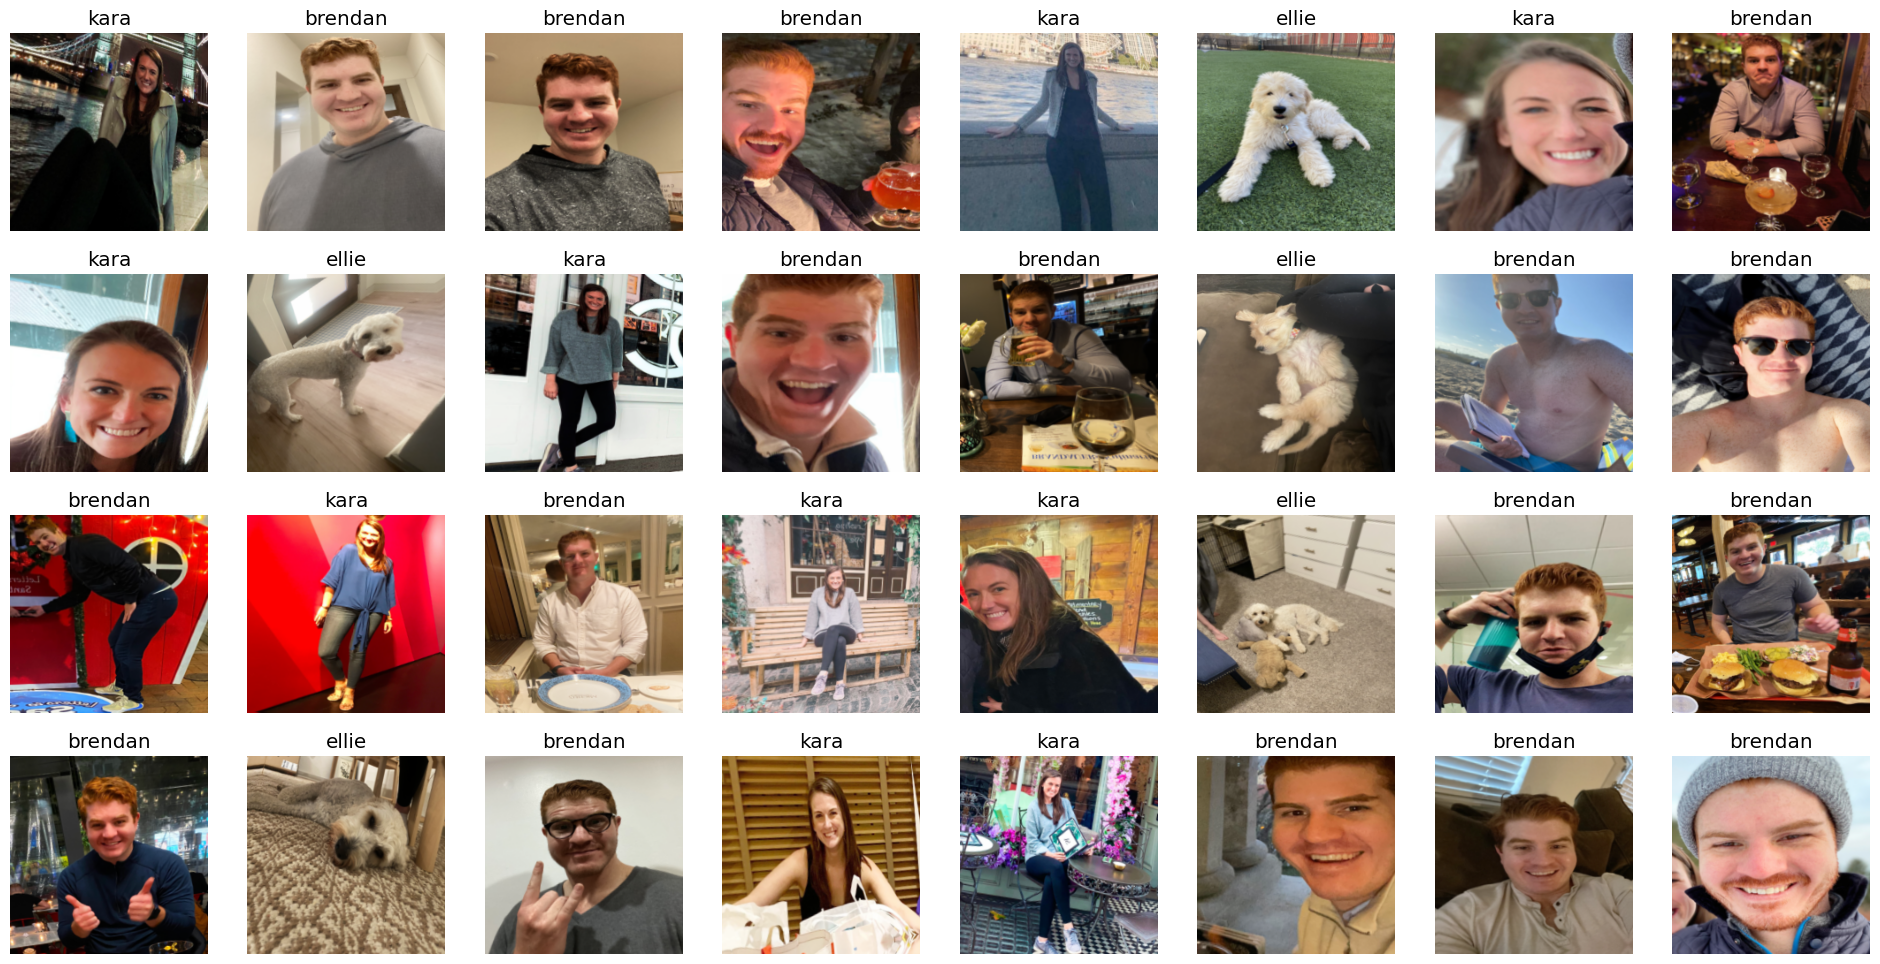

In [7]:
dls.train.show_batch(max_n=32, nrows=4)

# Training

In [8]:
learn = vision_learner(dls, resnet152, metrics=error_rate)
learn.fine_tune(6)

# Evaluation

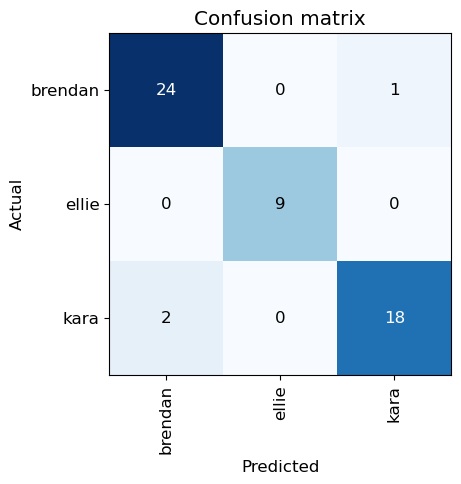

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

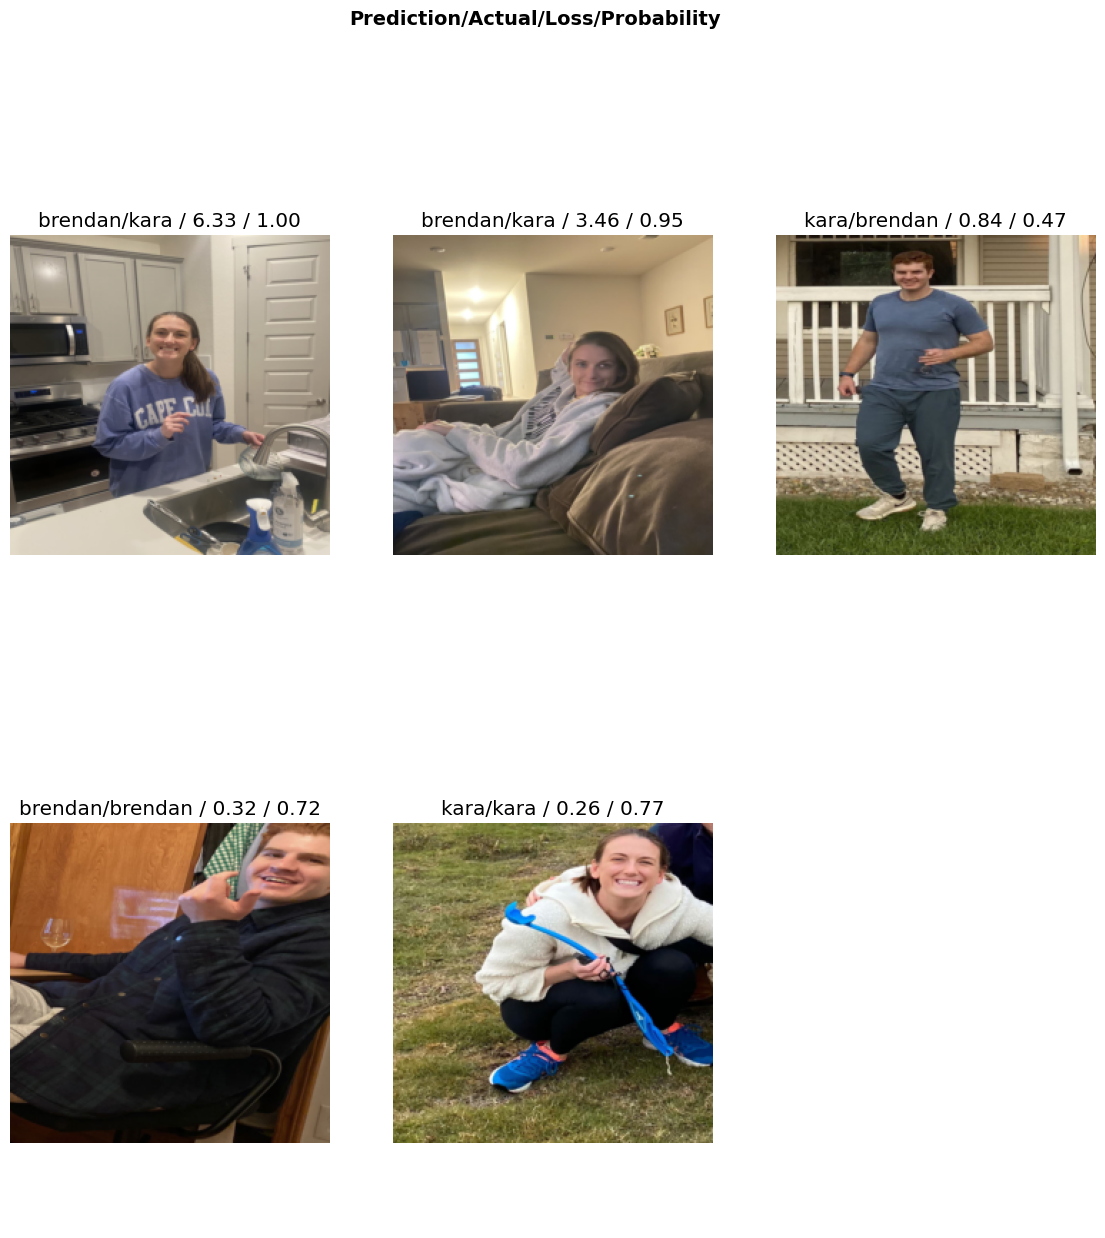

In [10]:
interp.plot_top_losses(5, nrows=2, figsize=(14, 14))

# Test Photos

********************************************************************************
Predicted Brendan with a probability of 70%


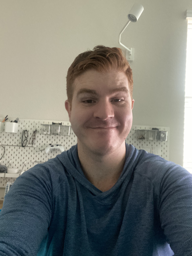

********************************************************************************


********************************************************************************
Predicted Kara with a probability of 100%


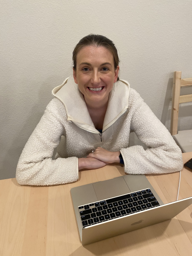

********************************************************************************


********************************************************************************
Predicted Kara with a probability of 100%


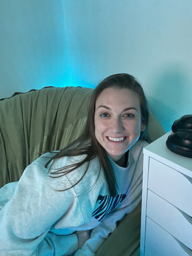

********************************************************************************


********************************************************************************
Predicted Ellie with a probability of 100%


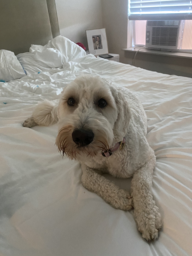

********************************************************************************


********************************************************************************
Predicted Ellie with a probability of 100%


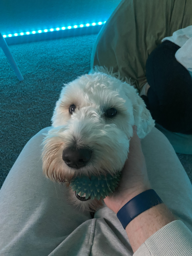

********************************************************************************


********************************************************************************
Predicted Brendan with a probability of 100%


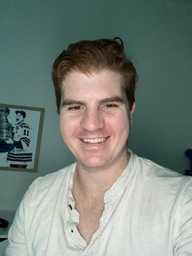

********************************************************************************


In [13]:
photo_dir = Path('/home/brendan/.data/images/family/test')
cats = list(learn.dls.vocab)

for filename in photo_dir.glob('*'):
    img = Image.open(filename)
    pred, _, pred_probas = learn.predict(filename)
    highest_prob = pred_probas[cats.index(pred)]
    
    print('*' * 80)
    print(f'Predicted {pred.title()} with a probability of {highest_prob:,.0%}')
    display(img.to_thumb(256, 256))
    print('*' * 80)